In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv('weight_height.csv')
df.head()        #Let's assume that Weight is independent feature and height is dependent feature

,Weight (kg),Height (cm)
0,53,194
1,98,170
2,69,162
3,50,170
4,56,164


Text(0, 0.5, 'Height')

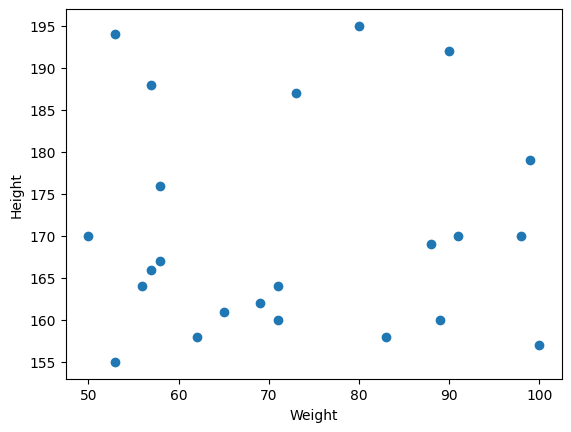

In [5]:
plt.scatter(df['Weight (kg)'] , df['Height (cm)'])
plt.xlabel("Weight")
plt.ylabel("Height")

Whenever we want to train the dataset , there are some steps to follow 
1. Dataset
2. Divide the feature based on independent and dependent feature
3. Train test split of the dataset (from sklearn)
4. Standardize the data

In [6]:
##Divide our dataset into independent and dependent feature
X = df[['Weight (kg)']] #Independent feature
y = df[['Height (cm)']] #Dependent feature

In [7]:
X,y

(    Weight (kg)
 0            53
 1            98
 2            69
 3            50
 4            56
 5            65
 6            71
 7            53
 8            58
 9            88
 10           90
 11           91
 12           71
 13           62
 14           83
 15           73
 16          100
 17           57
 18           57
 19           89
 20           80
 21           99
 22           58,
     Height (cm)
 0           194
 1           170
 2           162
 3           170
 4           164
 5           161
 6           160
 7           155
 8           176
 9           169
 10          192
 11          170
 12          164
 13          158
 14          158
 15          187
 16          157
 17          188
 18          166
 19          160
 20          195
 21          179
 22          167)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#Train test split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20,random_state=42)
#Here test_size=0.20 means that 20 % of the data will be put in the test set and the rest will be in the train set.

In [10]:
X.shape

(23, 1)

In [11]:
X_train.shape #20% of 23

(18, 1)

In [12]:
X_test.shape #5 % of 23

(5, 1)

In [13]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((18, 1), (5, 1), (18, 1), (5, 1))

In [14]:
#Standardize the dataset train independent data
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train.head()

,Weight (kg)
12,71
1,98
13,62
5,65
2,69


In [17]:
X_train = scaler.fit_transform(X_train) # Fit to data, then transform it , i.e. calculating the mean and standard deviation
X_test = scaler.transform(X_test)

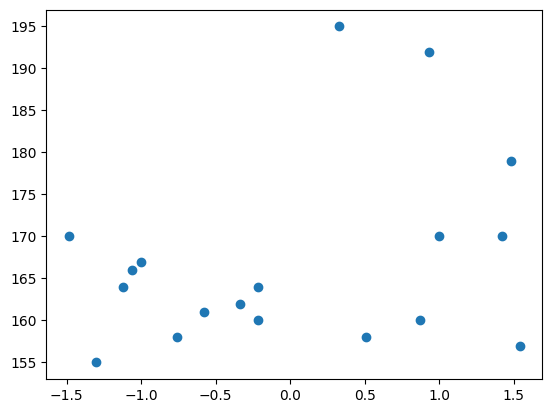

In [18]:
plt.scatter(X_train , y_train) 

In [19]:
#Train the simple linear Regression Model
#Linear regression model at sklearn
from sklearn.linear_model import LinearRegression
#Create a Linear Regression object
regressor = LinearRegression()

In [20]:
regressor.fit(X_train, y_train)

LinearRegression()

In [50]:
print("The slope or coefficient of the wwight is",regressor.coef_ ) #Since there is only 1 independent data
print("Intercept",regressor.intercept_)  
#Theta zero = 167.11111 , and theta one = 3.402

The slope or coefficient of the wwight is [[3.40288873]]
Intercept [167.11111111]


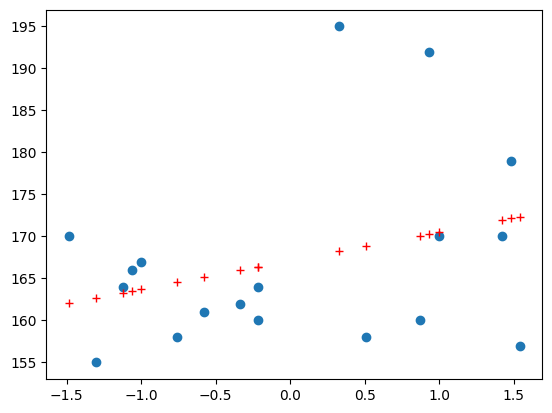

In [31]:
#Now let's create the one fit line 
plt.scatter(X_train,y_train)
plt.plot(X_train, regressor.predict(X_train),'r+')

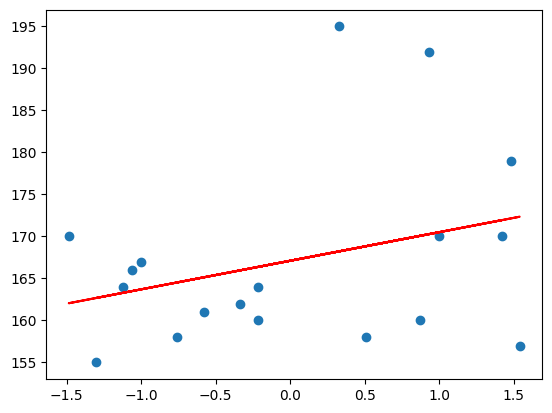

In [32]:
plt.scatter(X_train,y_train)
plt.plot(X_train, regressor.predict(X_train),'r')

PREDICTION OF TRAIN DATA
1. predicted height output = intercept + coef_ (weights)
2. y_pred_train = 167.111 + 3.402 (X_train)

#Prediction of test data
1. predicted height output = intercept + coef_ (weights)
2. y_pred_test = 167.111 + 3.402 (X_test)

In [33]:
y_pred_test = regressor.predict(X_test)

In [35]:
y_pred_test,y_test  #Y_test is the actual data

(array([[166.79069031],
        [169.88046232],
        [162.6709943 ],
        [163.7009183 ],
        [163.4949335 ]]),
     Height (cm)
 15          187
 9           169
 0           194
 8           176
 17          188)

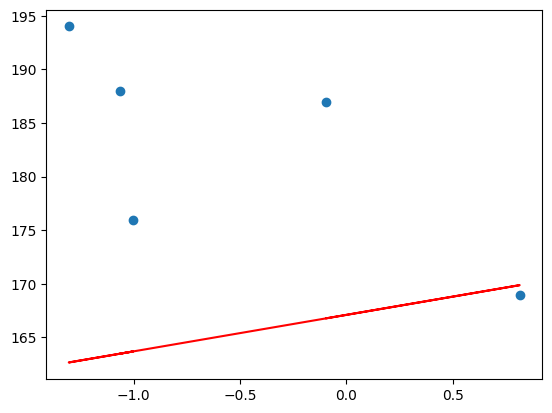

In [36]:
plt.scatter(X_test,y_test)
plt.plot(X_test, regressor.predict(X_test),'r')

# Performance Matrics

## MSE , MAE , RMSE
## R square and adjusted R square

In [39]:
#Search slearn metrics mean squared error
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [41]:
mse = mean_squared_error(y_test , y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
#The less the value of this , the better the performance will be of the model

428.4927409644717
17.844585180493986
20.70006620676542


In [42]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
score

-4.266626609691147

## Ajusted R square

 Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]

 where:
 
 R2 = The R2 of the model
 
 n = The number of observations
 
 k = The number of predictors in the model

In [43]:
#Display adjusted R-sqaured
1 - (1 - score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-6.022168812921529

In [44]:
regressor

LinearRegression()

In [46]:
## new data point weight is 80
scaled_weight = scaler.transform([[80]])
scaled_weight

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32956493]])

In [51]:
scaled_weight[0]

array([0.32956493])

In [53]:
print("The height prediction for weight 80kg is ",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80kg is  [[168.23258391]]


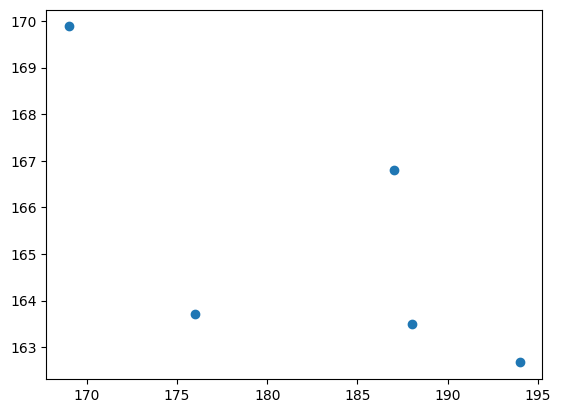

In [55]:
## Assumptions of whether our model is good or not
## plot a scatter plot for the prediciton
plt.scatter(y_test , y_pred_test)

In [57]:
# Another Assumptions is Residuals
residuals = y_test - y_pred_test
residuals

,Height (cm)
15,20.209310
9,-0.880462
0,31.329006
8,12.299082
17,24.505066


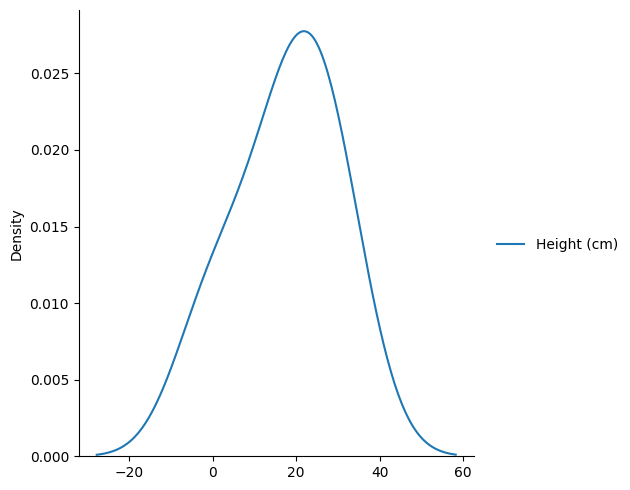

In [58]:
#Plot this residuals
import seaborn as sns
sns.displot(residuals,kind='kde')

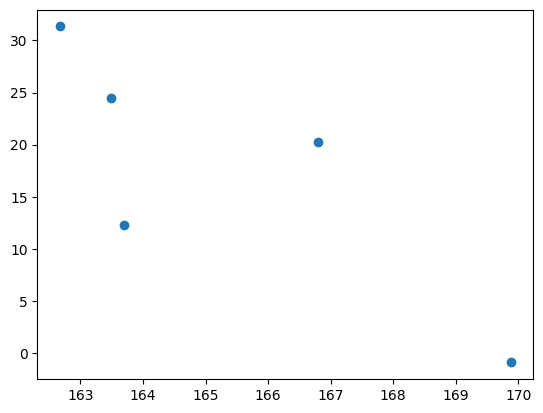

In [62]:
# another assumptions is scatter plot with respect to prediction and residuals
#Uniform ditribution should be there
plt.scatter(y_pred_test  ,residuals)
#So yaa this is good model we can say because this is in uniform dstribution